In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

reviewsDF = pd.read_csv("../data/reviews.csv.gz")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1078,142,2008-09-13,1344,Amy,A fabulously cozy place! It was slightly diff...
1,1078,207074,2011-03-22,451657,Angela,perfect!---:) Will stay again!
2,1078,217779,2011-04-04,473682,Jenn,I had a great stay at Brian's garden apartment...
3,1078,6841593,2013-08-26,8153398,Kathryn,The reservation was canceled 19 days before ar...
4,1078,7071134,2013-09-05,420381,Rita,Fantastic Experience! My daughter and I staye...


To retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral' I am using built-in analyzer in the NLTK Python library to assign polarity scoore to each comment.

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0

for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg']) 
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future r

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,1078,142,2008-09-13,1344,Amy,A fabulously cozy place! It was slightly diff...,"{'neg': 0.023, 'neu': 0.638, 'pos': 0.339, 'co...",0.023,0.339,0.638,0.9744
1,1078,207074,2011-03-22,451657,Angela,perfect!---:) Will stay again!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,1078,217779,2011-04-04,473682,Jenn,I had a great stay at Brian's garden apartment...,"{'neg': 0.05, 'neu': 0.745, 'pos': 0.204, 'com...",0.050,0.204,0.745,0.9188
3,1078,6841593,2013-08-26,8153398,Kathryn,The reservation was canceled 19 days before ar...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,1078,7071134,2013-09-05,420381,Rita,Fantastic Experience! My daughter and I staye...,"{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...",0.000,0.235,0.765,0.9917


In [5]:
# Lets visualize polarity score for positivity

polarDF=reviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,4742,0.0,positive
1,35037,0.1,positive
2,81402,0.2,positive
3,80084,0.3,positive
4,49344,0.4,positive


In [6]:
# Lets visualize polarity score for negativity

polarDFneg=reviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head() 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,54162,0.0,negative
1,4916,0.1,negative
2,712,0.2,negative
3,209,0.3,negative
4,68,0.4,negative


In [7]:
# Lets visualize polarity score for neutrality

polarDFnut=reviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head() 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,168,0.0,neutrl
1,5346,0.1,neutrl
2,8237,0.2,neutrl
3,14150,0.3,neutrl
4,28361,0.4,neutrl


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

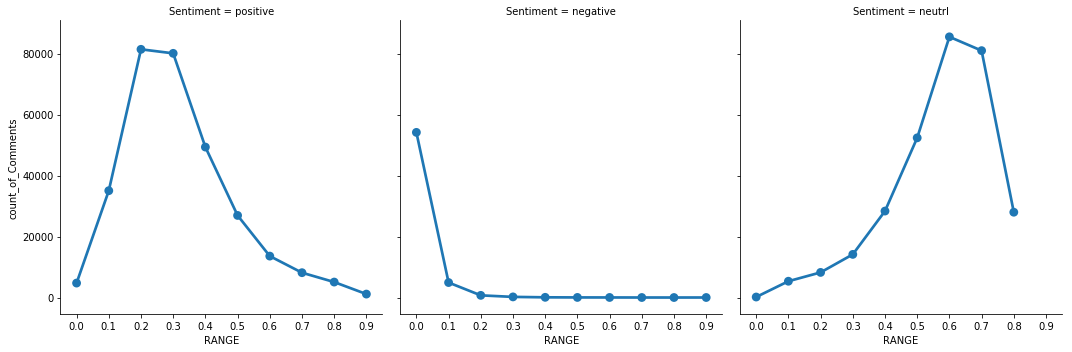

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")

It can be seen that Almost none of the texts are classified as having significant amounts of negativity. In fact, a significant amount of them are given exactly 0.0 negativity.It can be clearly seen that most of the comments are neutral.However, a signifigant amount of comments are positive.

We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. But it could serve to be useful information to see correlation between price and number of reviews.Lets check if there is any relationship between number of reviews and price of listing

Text(0, 0.5, 'Number of reviews')

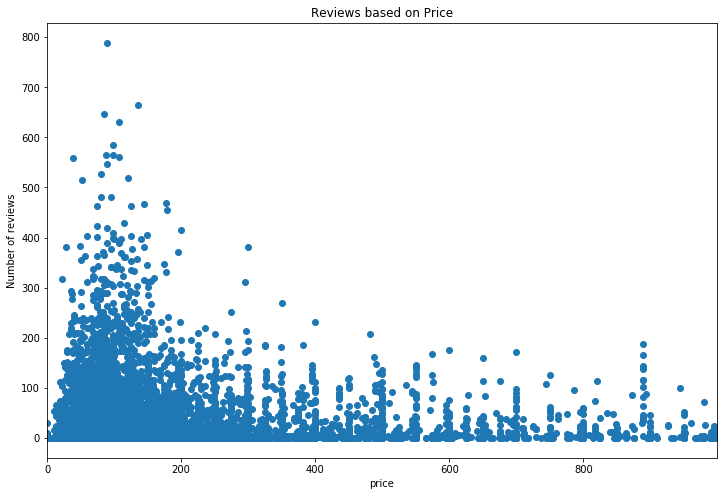

In [25]:
inputDF = pd.read_csv('listings.csv.gz') 
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices
price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')
price_review = inputDF[inputDF.price < 1000] 


price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews") 


The graph shows that listings with prices that range 0-200 dollars get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up. This indicates that more people book listings that are around less than 1000 dollars in prices. This shows that it is not necessary for an expensive listing to have large number of reviews. Heneforth there is no exact relation between Prices and Number of Reviews for a listing.

In [28]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in reviewsDF.iterrows():
    words += row['comments'] 

In [31]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9'] 


In [32]:
 from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords]) 

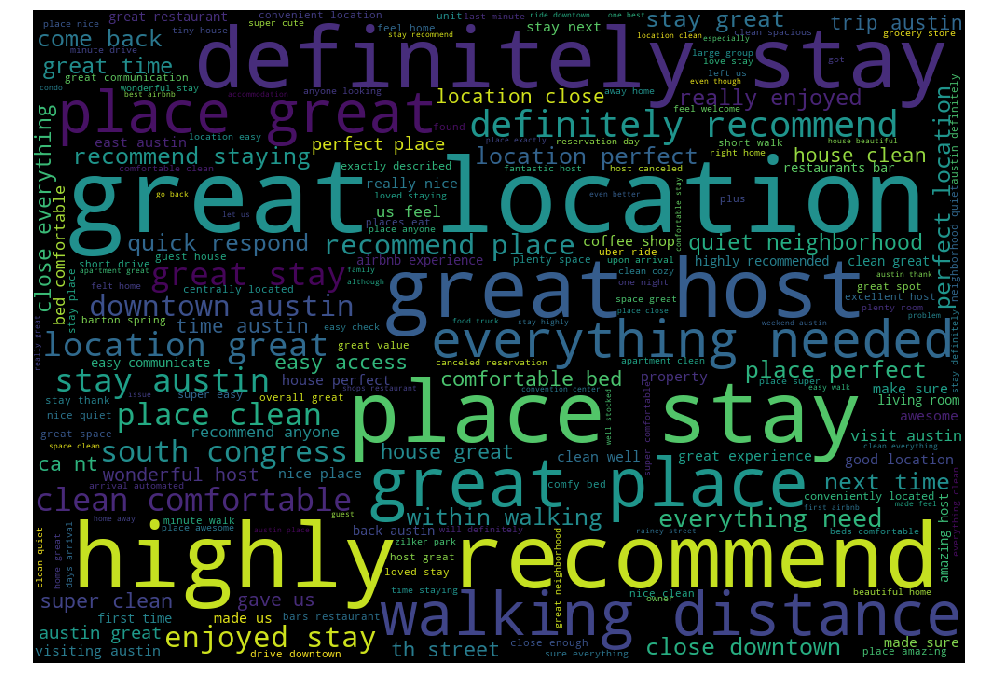

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that the most talked about words are "great location", "great host", "walking distance" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing.

# HOST ANALYSIS & RECOMMENDATION SYSTEM FOR PRICES

In [26]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings.csv.gz')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

inputDF["host_since"]= pd.to_datetime(inputDF['host_since'])
inputDF['day'] = inputDF['host_since'].dt.day
inputDF['month'] = inputDF['host_since'].dt.month
inputDF['year'] = inputDF['host_since'].dt.year
inputDF.head() 


,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,day,month,year
0,1078,t,Entire home/apt,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",flexible,98.0,85.0,8,1,2013
1,2265,f,Entire home/apt,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,93.0,225.0,23,8,2008
2,5245,f,Private room,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,91.0,100.0,23,8,2008
3,5456,f,Entire home/apt,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",strict_14_with_grace_period,96.0,95.0,16,2,2009
4,5769,f,Private room,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,98.0,40.0,19,2,2009


Text(0, 0.5, 'number of hosts')

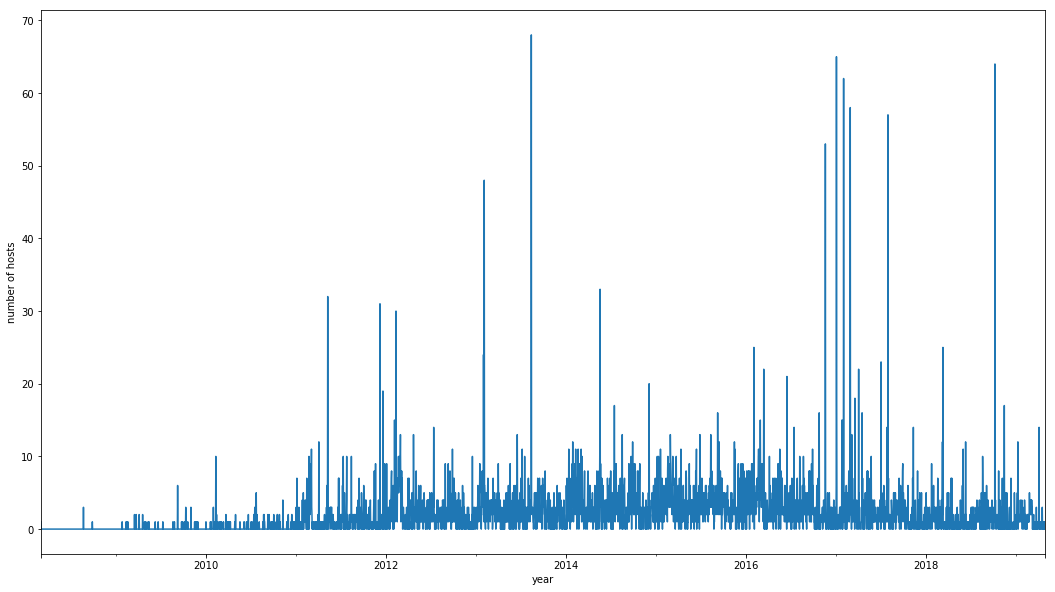

In [3]:
# this graph shows count of host registered everyday by resampling the data for each day
inputDF = inputDF[inputDF.year > 2007]
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0, 0.5, 'Number of hosts')

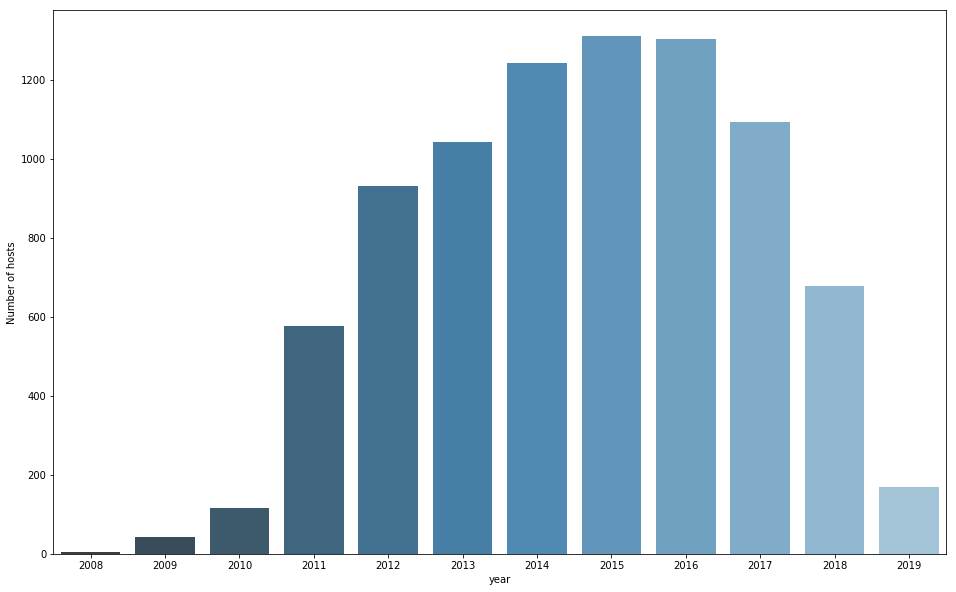

In [4]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')


# It can be analyzed that Most of the hosts registered in the year 2015.Lets analyze the months

In [5]:
#plotting for all months for each year

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


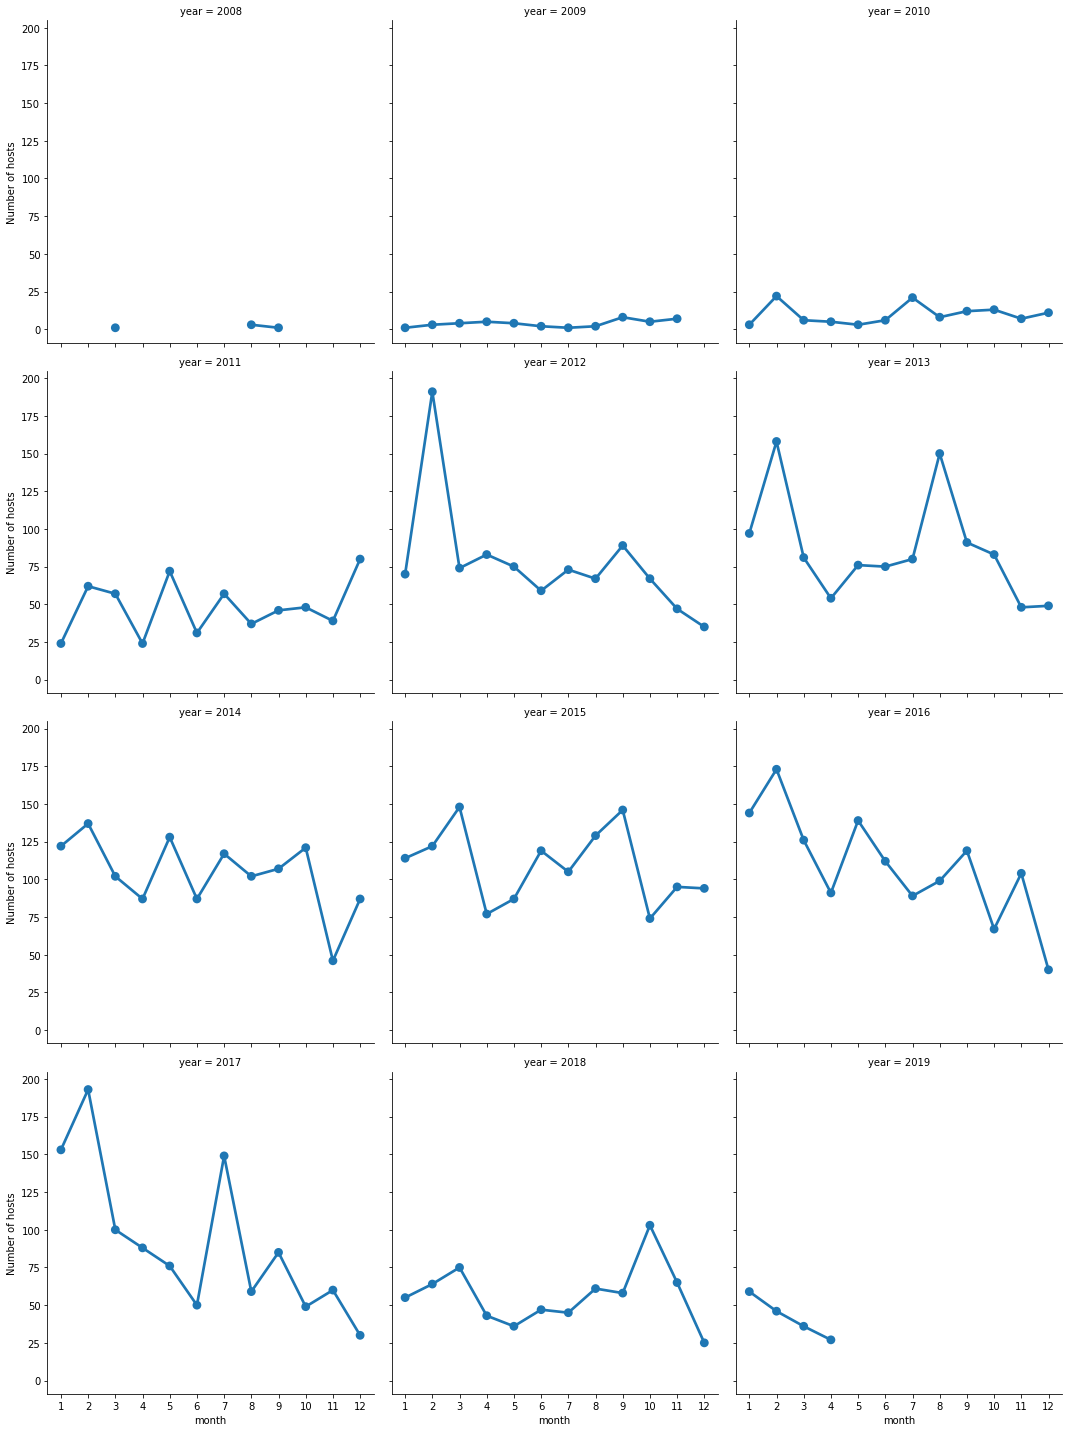

In [6]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3)

it can be seen that most of the hosts registered in the month of july,november, october, and march.Although there is no specific trend followed.Lets check do people register more on weekends?

Text(0, 0.5, 'Number of hosts')

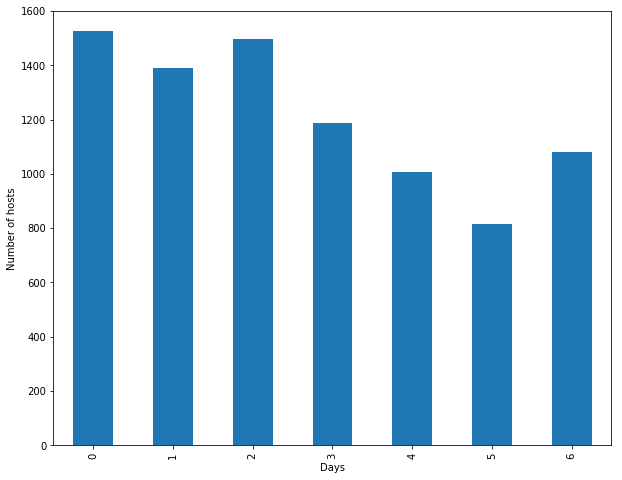

In [7]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts") 


After analyzing and looking at all the factors which contributes towards deciding the price of a listing I ma trying to develop a recommendation system for determining the price of test data while training the system on the training data

I am only considering the columns on which Prices are found to be dependent as the original dataset consists of so many unwanted columns.I have cleaned the dataset by removing arows 0 as their number of bedrooms, batrooms ,beds and converted the price column data into a float to perform operations on the same.

Data is presented in categorial form.Hence I am using pandas' get_dummies function to convert Categorial variables into indicator variables.

In [8]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [9]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [11]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [12]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,15,98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,35,93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,25,91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,31,96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,21,98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [13]:
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import ensemble

split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2= train_test_split(split_data,inputDF.price, test_size=0.4,train_size = 0.6,random_state=13) 

In [14]:
# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 297.0004702562897
standard deviation: 817.327235001824


In [15]:
train1['host_since'] = pd.to_numeric(train1.host_since)  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
test1['host_since'] = pd.to_numeric(test1.host_since) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print ("Linear Regression: " + str(linear_reg_error)) 

Linear Regression: 188.26839868586586


This is a small recommendation system which I built using linear Regression.It is not accurate and gives an error of $188.26 in price.The future scope of this project could be using different algorithm to predict accurate pricesof test data.